In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
wine_df = pd.read_csv("C:\\Users\\PUNEET SINGH\\winequality-red.csv")
wine_df.shape

(1599, 12)

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


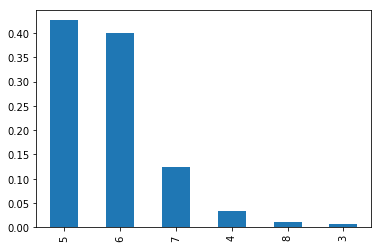

In [4]:
# CHECKING THE VALUE_COUNT OF THE TARGET VARIABLE
wine_df['quality'].value_counts(normalize=True).plot.bar()

In [5]:
# IT IS A MULTICLASSIFIER PROBLEM

In [6]:
# SUMMARY OF THE DATA
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# CHECKING FOR MISSING VALUES IN THE DATA
wine_df.isnull().sum().any()

False

In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
# CALCULATING THE CORRELATION BETWEEN THE INDEPENDENT VARIABLES OF THE DATA
# DROPPING THE TARGET VARIABLE
df = wine_df.drop(['quality'],axis = 1)

In [10]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [11]:
# CREATING A CORREALTION MATRIX
corr_matrix = df.corr().abs()

In [12]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape).astype(np.bool)))
upper

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.0,0.256131,0.671703,0.114777,0.093705,0.153794,0.113181,0.668047,0.682978,0.183006,0.061668
volatile acidity,NaN,1.000000,0.552496,0.001918,0.061298,0.010504,0.076470,0.022026,0.234937,0.260987,0.202288
citric acid,NaN,NaN,1.000000,0.143577,0.203823,0.060978,0.035533,0.364947,0.541904,0.312770,0.109903
residual sugar,NaN,NaN,NaN,1.000000,0.055610,0.187049,0.203028,0.355283,0.085652,0.005527,0.042075
chlorides,NaN,NaN,NaN,NaN,1.000000,0.005562,0.047400,0.200632,0.265026,0.371260,0.221141
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.667666,0.021946,0.070377,0.051658,0.069408
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.071269,0.066495,0.042947,0.205654
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.341699,0.148506,0.496180
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.196648,0.205633
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.093595


In [13]:
# TAKING THE THRESHOLD VALUE = 0.8
to_drop = [column for column in upper.columns if any(upper[column]>0.8)]
to_drop

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [14]:
# EVERY FEATURE OF THE DATA SEEMS TO BE CORRELATED 
# HENCE CANNOT DROP ANY FEATURE

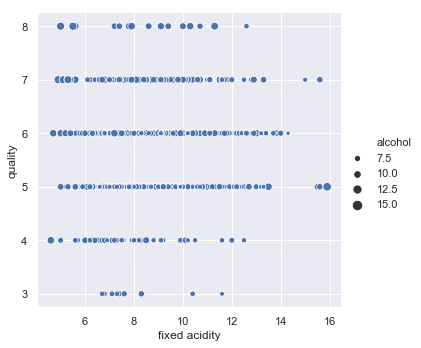

In [15]:
# VISUALIZING THE RELATION BETWEEN DIFFERENT FEATURES AND TARGET VARIABLE
sns.set(style='darkgrid')
sns.relplot(x='fixed acidity',y='quality',size='alcohol',data=wine_df)

In [16]:
# DEPEDNING UPON THE ACIDITY QUALITY 6 WINE IS MAXIMUM IN NUMBER
# IMPORTANT FEATURE

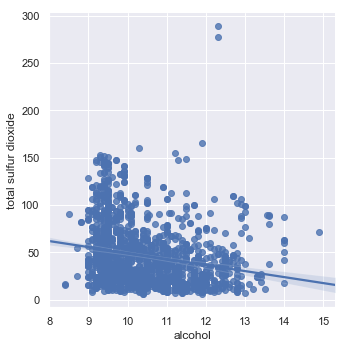

In [17]:
sns.lmplot(x='alcohol',y='total sulfur dioxide',data=wine_df)

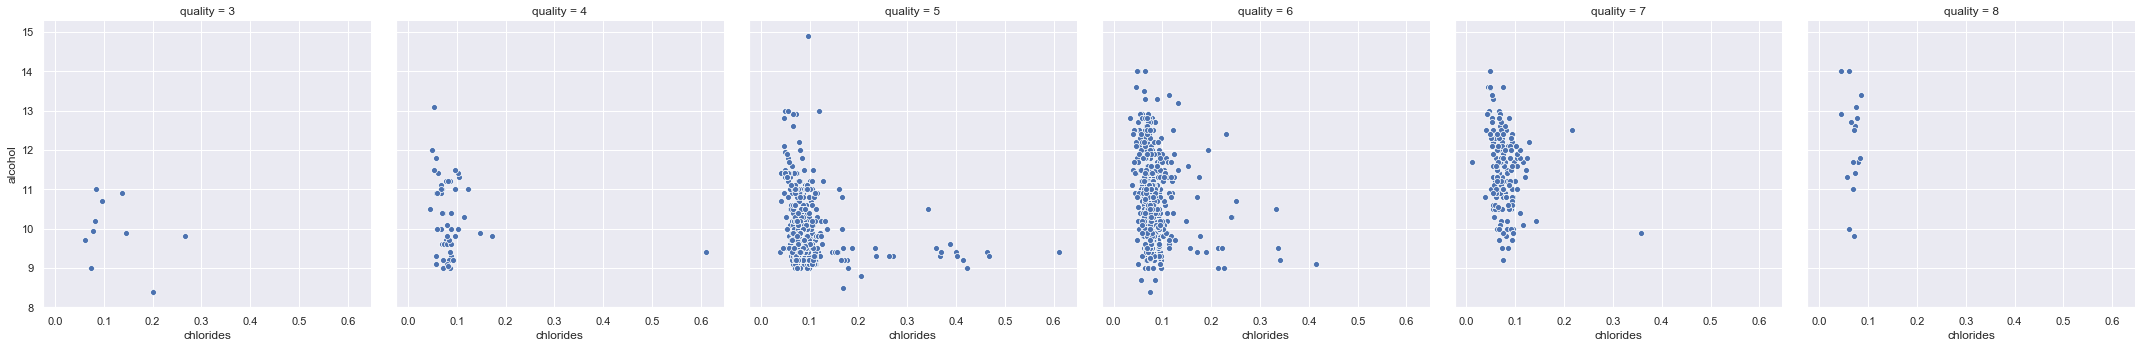

In [18]:
sns.relplot(x='chlorides',y='alcohol',col='quality',data=wine_df)

In [19]:
# AT 0.1 CHLORIDE QUALITY 6  HAS THE MAXIMUM ALCOHOL

In [20]:
# UNIVARIATE ANLAYSIS
# CHECKING WHETHER THE FEATURE IS NORMALLY DISTRIBUTED OR NOT

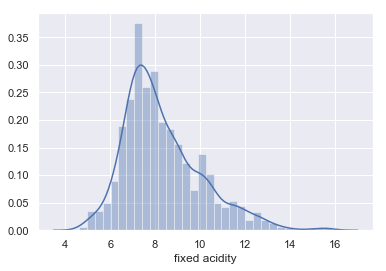

In [21]:
sns.distplot(wine_df['fixed acidity'])

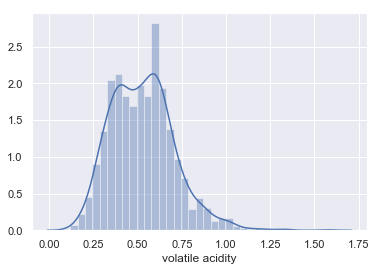

In [22]:
sns.distplot(wine_df['volatile acidity'])

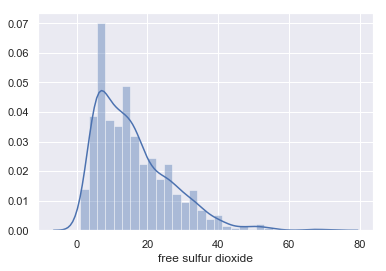

In [23]:
sns.distplot(wine_df['free sulfur dioxide'])

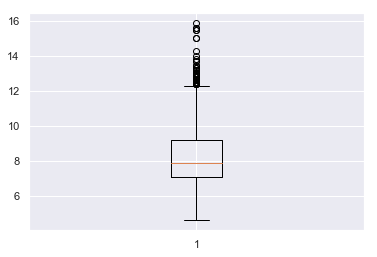

In [24]:
# CHECKING FOR OUTLIERS THROUGH BOXPLOT AND THROUGH ZSCORE
# IMPORTING THE LIBRARY
from scipy.stats import zscore
plt.boxplot(wine_df['fixed acidity'])
plt.show()

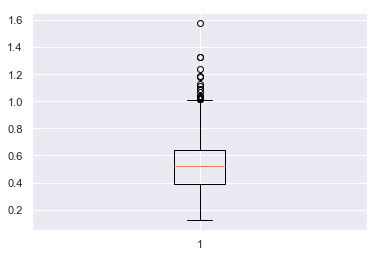

In [25]:
plt.boxplot(wine_df['volatile acidity'])
plt.show()

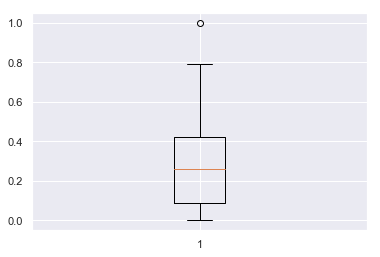

In [26]:
plt.boxplot(wine_df['citric acid'])
plt.show()

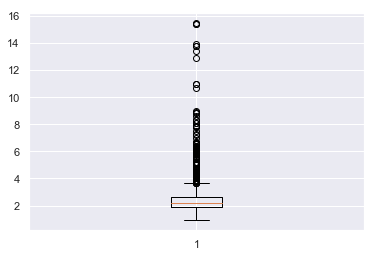

In [27]:
plt.boxplot(wine_df['residual sugar'])
plt.show()

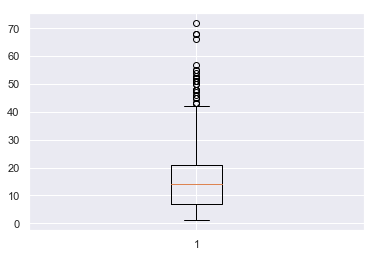

In [28]:
plt.boxplot(wine_df['free sulfur dioxide'])
plt.show()

In [29]:
# REMOVING THE OUTLIERS FROM INDEPENDENT VARIABLES
z = np.abs(zscore(wine_df))
# threshold = 3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [30]:
wine_df = wine_df[(z < 3).all(axis=1)]

In [31]:
# OUTLIERS HAS BEEN REMOVED

In [32]:
# DIVIDING THE DATA INTO INDEPENDENT AND DEPENDENT VARIBLES
x = wine_df.drop('quality',axis=1)
y = wine_df['quality']

In [33]:
# SPLITTING THE DATASET INTO TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=47)


In [34]:
# SCALING DOWN THE INDEPENDENT FEATURES OF THE DATA THROUGH STANDARD SCALER
# IMPORTING THE LIBRARY
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [35]:
x_train = sc.fit_transform(x_train)

In [36]:
x_test = sc.transform(x_test)

In [37]:
# CHECKING THE MEAN AND STANDARD DEVIATION OF THE STANDARDIZED DATA

In [38]:
print(x_train.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [39]:
# IMPORTING THE CLASSIFICAION MODELS AND SCORE METRICS FROM SKLEARN

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [41]:
lr = LogisticRegression(random_state=47).fit(x_train,y_train)
print('Score of the trained model:',lr.score(x_train,y_train))
pred = lr.predict(x_test)
print('accuracy score of the test set:',accuracy_score(pred,y_test))
print('confusion matrix :',confusion_matrix(y_test,pred))
print('classification report of the model:',classification_report(y_test,pred))

Score of the trained model: 0.6353448275862069
accuracy score of the test set: 0.5601374570446735
confusion matrix : [[ 0  7  2  0  0]
 [ 0 91 33  0  0]
 [ 0 45 63 10  0]
 [ 0  4 24  9  0]
 [ 0  0  2  1  0]]
classification report of the model:               precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.62      0.73      0.67       124
           6       0.51      0.53      0.52       118
           7       0.45      0.24      0.32        37
           8       0.00      0.00      0.00         3

   micro avg       0.56      0.56      0.56       291
   macro avg       0.32      0.30      0.30       291
weighted avg       0.53      0.56      0.54       291



In [42]:
# OUR TEST MODEL IS ALSO PREDICTING GOOD AS IT CLEARS THAT OUR MODEL IS NOT OVERFIT.

In [43]:
svc = SVC(random_state=47).fit(x_train,y_train)
print('Score of the trained model:',svc.score(x_train,y_train))
pred = svc.predict(x_test)
print('accuracy score of the test set:',accuracy_score(y_test,pred))
print('confusion matrix :',confusion_matrix(y_test,pred))
print('classification report of the model:',classification_report(y_test,pred))

Score of the trained model: 0.7120689655172414
accuracy score of the test set: 0.5807560137457045
confusion matrix : [[ 0  7  2  0  0]
 [ 0 81 41  2  0]
 [ 0 37 74  7  0]
 [ 0  1 22 14  0]
 [ 0  0  3  0  0]]
classification report of the model:               precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.64      0.65      0.65       124
           6       0.52      0.63      0.57       118
           7       0.61      0.38      0.47        37
           8       0.00      0.00      0.00         3

   micro avg       0.58      0.58      0.58       291
   macro avg       0.35      0.33      0.34       291
weighted avg       0.56      0.58      0.57       291



In [44]:
# USING THE BAGGING MODELS

In [45]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=2,max_leaf_nodes=2,random_state=47).fit(x_train,y_train)
print('Score of the trained model:',svc.score(x_train,y_train))
pred = dtc.predict(x_test)
print('accuracy score of the test set:',accuracy_score(pred,y_test))
print('confusion matrix :',confusion_matrix(y_test,pred))
print('classification report of the model:',classification_report(y_test,pred))

Score of the trained model: 0.7120689655172414
accuracy score of the test set: 0.5567010309278351
confusion matrix : [[  0   8   1   0   0]
 [  0 101  23   0   0]
 [  0  57  61   0   0]
 [  0  10  27   0   0]
 [  0   0   3   0   0]]
classification report of the model:               precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.57      0.81      0.67       124
           6       0.53      0.52      0.52       118
           7       0.00      0.00      0.00        37
           8       0.00      0.00      0.00         3

   micro avg       0.56      0.56      0.56       291
   macro avg       0.22      0.27      0.24       291
weighted avg       0.46      0.56      0.50       291



In [46]:
rf = RandomForestClassifier(n_estimators=30,criterion='gini',max_depth=3,n_jobs=-1,random_state=47).fit(x_train,y_train)
print('Score of the trained model:',rf.score(x_train,y_train))
pred = rf.predict(x_test)
print('accuracy score of the test set:',accuracy_score(pred,y_test))
print('confusion matrix :',confusion_matrix(y_test,pred))
print('classification report of the model:',classification_report(y_test,pred))

Score of the trained model: 0.6405172413793103
accuracy score of the test set: 0.5670103092783505
confusion matrix : [[ 0  7  2  0  0]
 [ 0 87 37  0  0]
 [ 0 42 75  1  0]
 [ 0  2 32  3  0]
 [ 0  0  3  0  0]]
classification report of the model:               precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.63      0.70      0.66       124
           6       0.50      0.64      0.56       118
           7       0.75      0.08      0.15        37
           8       0.00      0.00      0.00         3

   micro avg       0.57      0.57      0.57       291
   macro avg       0.38      0.28      0.27       291
weighted avg       0.57      0.57      0.53       291



In [47]:
# APPLYING THE BOOSTING METHOD
ad = AdaBoostClassifier(random_state=47).fit(x_train,y_train)
print('Score of the trained model:',ad.score(x_train,y_train))
pred = ad.predict(x_test)
print('accuracy score of the test set:',accuracy_score(pred,y_test))
print('confusion matrix :',confusion_matrix(y_test,pred))
print('classification report of the model:',classification_report(y_test,pred))

Score of the trained model: 0.27413793103448275
accuracy score of the test set: 0.23367697594501718
confusion matrix : [[ 6  2  1  0  0]
 [81 16 22  5  0]
 [52 12 36 18  0]
 [ 6  6 11 10  4]
 [ 1  0  0  2  0]]
classification report of the model:               precision    recall  f1-score   support

           4       0.04      0.67      0.08         9
           5       0.44      0.13      0.20       124
           6       0.51      0.31      0.38       118
           7       0.29      0.27      0.28        37
           8       0.00      0.00      0.00         3

   micro avg       0.23      0.23      0.23       291
   macro avg       0.26      0.27      0.19       291
weighted avg       0.44      0.23      0.28       291



In [48]:
# TUNING THE MODEL WITH GRID SEARCH CV AND  USING PIPELINE 
# IMPORTING THE LIBRAIRES
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
grid_param={'kernel':['poly','rbf','linear'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6],'C':[1,10,100]}

In [49]:
grid = GridSearchCV(svc,param_grid=grid_param,scoring='accuracy',cv=7,n_jobs=-1)

In [50]:
grid.fit(x_train,y_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=47,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['poly', 'rbf', 'linear'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'C': [1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [51]:
grid.best_score_

0.6612068965517242

In [52]:
print('best parameters of the svc model:',grid.best_params_)


best parameters of the svc model: {'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}


In [53]:
# FIRSTLY THE SVC MODEL WAS ACHIEVING THE SCORE OF 57% AND AFTER GRID SEARCH IT IS 66 % 
# REFITTING THE BEST PARAMETERS OF THE MODEL

In [57]:
svc = SVC(C=1,kernel='rbf',gamma=0.3)
svc.fit(x_train,y_train)
print('Score of the trained model:',svc.score(x_train,y_train))
pred = svc.predict(x_test)
print('confusion matrix :',confusion_matrix(y_test,pred))
print('classification report of the model:',classification_report(y_test,pred))

Score of the trained model: 0.8137931034482758
confusion matrix : [[ 0  7  2  0  0]
 [ 0 88 36  0  0]
 [ 0 37 75  6  0]
 [ 0  1 23 13  0]
 [ 0  0  3  0  0]]
classification report of the model:               precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.66      0.71      0.68       124
           6       0.54      0.64      0.58       118
           7       0.68      0.35      0.46        37
           8       0.00      0.00      0.00         3

   micro avg       0.60      0.60      0.60       291
   macro avg       0.38      0.34      0.35       291
weighted avg       0.59      0.60      0.59       291



In [58]:
# SCORE OF THE SVC MODEL IS 81.3 % WHICH IS BETTER THAN ALL THE MODELS
# SO SAVING THE SVC MODEL

In [59]:
import pickle

In [60]:
filehandler = open("finalmodel_23.obj","wb")
# saving the model in pickel string
saved_rf_model = pickle.dump(svc,filehandler)
filehandler.close()